In [17]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
num_securities = 1000
num_periods = 1000
period_frequency = 'W'
start_date = '2000-12-31'

In [3]:
np.random.seed([3, 1415])
means = [0, 0]
covariance = [[1., 5e-3],  [5e-3, 1.]]

In [5]:
m = np.random.multivariate_normal(means, covariance, (num_periods, num_securities)).T

(2, 1000, 1000)

In [9]:
ids = pd.Index(['s{:05d}'.format(s) for s in range(num_securities)])
tidx = pd.date_range(start=start_date, periods=num_periods, freq=period_frequency)

DatetimeIndex(['2000-12-31', '2001-01-07', '2001-01-14', '2001-01-21',
               '2001-01-28', '2001-02-04', '2001-02-11', '2001-02-18',
               '2001-02-25', '2001-03-04',
               ...
               '2019-12-22', '2019-12-29', '2020-01-05', '2020-01-12',
               '2020-01-19', '2020-01-26', '2020-02-02', '2020-02-09',
               '2020-02-16', '2020-02-23'],
              dtype='datetime64[ns]', length=1000, freq='W-SUN')

In [10]:
security_returns = pd.DataFrame(m[0] / 25 + 1e-7, tidx, ids)
security_signals = pd.DataFrame(m[1], tidx,  ids)

In [13]:
def qcut(s, q=5):
    labels = ['q{}'.format(i) for i in range(1, 6)]
    return pd.qcut(s, q, labels=labels)

In [15]:
cut = security_signals.stack().groupby(level=0, group_keys=True).apply(qcut)

In [16]:
returns_cut = security_returns.stack().rename('returns') \
    .to_frame().set_index(cut, append=True) \
        .swaplevel(2, 1).sort_index().squeeze() \
            .groupby(level=[0, 1], group_keys=True).mean().unstack()

In [18]:
fig = plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

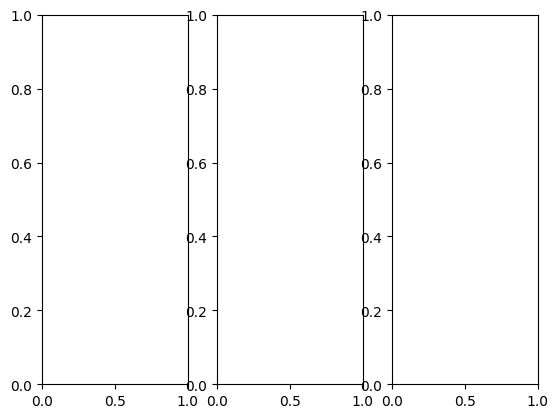

In [19]:
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax3 = plt.subplot2grid((1, 3), (0, 2))